# Import data

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Phase 1: Monthly data
sp500 = yf.download("^GSPC", start="2009-01-01", end="2019-12-31", interval="1mo")
returns_monthly_df = np.log(sp500['Close'] / sp500['Close'].shift(1)).dropna()
returns_monthly = returns_monthly_df.values
dates_monthly = returns_monthly_df.index

print("Monthly Data:")
print(f"Observations: {len(returns_monthly)}")
print(f"Mean return: {returns_monthly.mean():.4f}")
print(f"Std dev: {returns_monthly.std():.4f}")
print("\n")

# Phase 2: Weekly
sp500_weekly = yf.download("^GSPC", start="2009-01-01", end="2019-12-31", interval="1wk")
returns_weekly_df = np.log(sp500_weekly['Close'] / sp500_weekly['Close'].shift(1)).dropna()
returns_weekly = returns_weekly_df.values
dates_weekly = returns_weekly_df.index

print("Weekly Data:")
print(f"Observations: {len(returns_weekly)}")
print(f"Mean return: {returns_weekly.mean():.4f}")
print(f"Std dev: {returns_weekly.std():.4f}")
print("\n")

# Phase 3: Daily
sp500_daily = yf.download("^GSPC", start="2007-01-01", end="2025-12-01", interval="1d")
returns_daily_df = np.log(sp500_daily['Close'] / sp500_daily['Close'].shift(1)).dropna()
returns_daily = returns_daily_df.values
dates_daily = returns_daily_df.index

print("Daily Data:")
print(f"Observations: {len(returns_daily)}")
print(f"Mean return: {returns_daily.mean():.4f}")
print(f"Std dev: {returns_daily.std():.4f}")

/var/folders/kv/zt7j48t16bxdjlpfww8l32t00000gn/T/ipykernel_34063/35843677.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", start="2009-01-01", end="2019-12-31", interval="1mo")
[*********************100%***********************]  1 of 1 completed
/var/folders/kv/zt7j48t16bxdjlpfww8l32t00000gn/T/ipykernel_34063/35843677.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_weekly = yf.download("^GSPC", start="2009-01-01", end="2019-12-31", interval="1wk")
[*********************100%***********************]  1 of 1 completed
/var/folders/kv/zt7j48t16bxdjlpfww8l32t00000gn/T/ipykernel_34063/35843677.py:26: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_daily = yf.download("^GSPC", start="2007-01-01", end="2025-12-01", interval="1d")


Monthly Data:
Observations: 131
Mean return: 0.0104
Std dev: 0.0382


Weekly Data:
Observations: 573
Mean return: 0.0022
Std dev: 0.0206




[*********************100%***********************]  1 of 1 completed

Daily Data:
Observations: 4757
Mean return: 0.0003
Std dev: 0.0126


# Phase 1 - Monthly data

## Data exploration

In [3]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

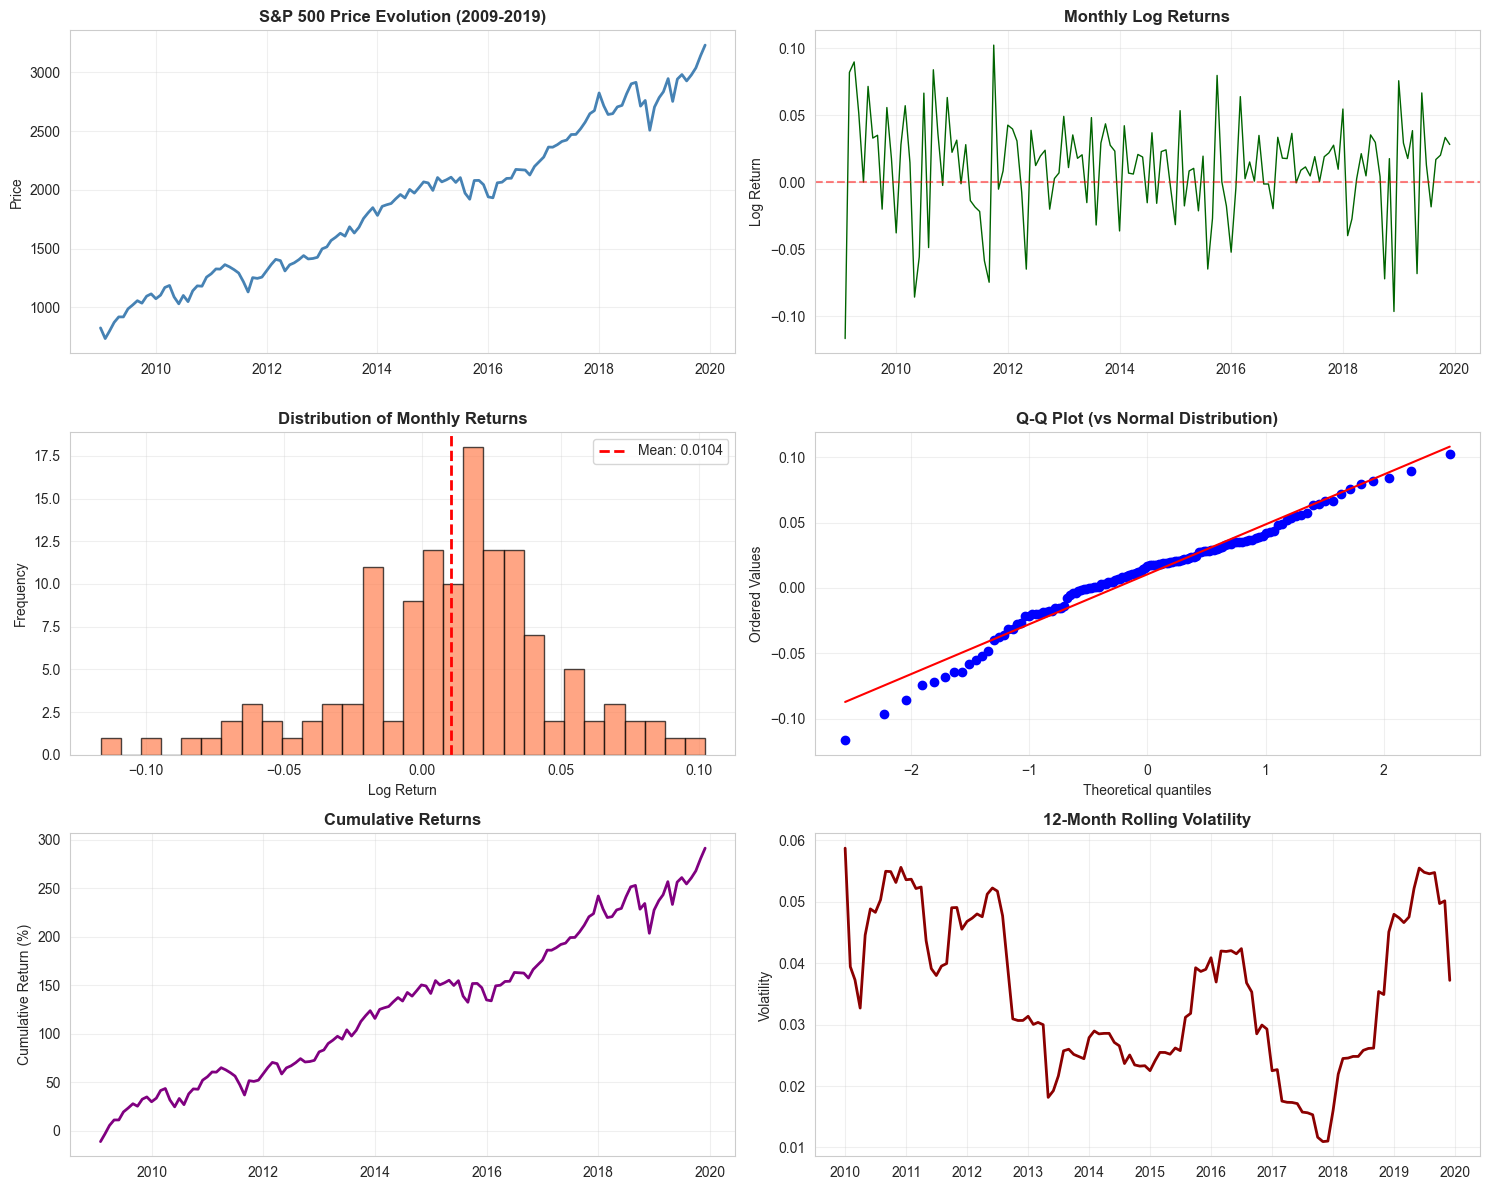


✓ Exploratory plots saved to 'phase1_exploratory.png'


In [ ]:
# Create comprehensive exploratory plots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# 1. Price evolution
axes[0, 0].plot(sp500.index, sp500['Close'], color='steelblue', linewidth=2)
axes[0, 0].set_title('S&P 500 Price Evolution (2009-2019)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Price')
axes[0, 0].grid(True, alpha=0.3)

# 2. Log returns over time
axes[0, 1].plot(dates_monthly, returns_monthly, color='darkgreen', linewidth=1)
axes[0, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[0, 1].set_title('Monthly Log Returns', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Log Return')
axes[0, 1].grid(True, alpha=0.3)

# 3. Distribution of returns
axes[1, 0].hist(returns_monthly, bins=30, color='coral', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(returns_monthly.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {returns_monthly.mean():.4f}')
axes[1, 0].set_title('Distribution of Monthly Returns', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Log Return')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Q-Q plot (check for normality)
returns_array = np.array(returns_monthly).flatten()  # Convert to 1D numpy array
stats.probplot(returns_array, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (vs Normal Distribution)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

# 5. Cumulative returns
cumulative_returns = np.exp(np.cumsum(returns_monthly)) - 1
axes[2, 0].plot(dates_monthly, cumulative_returns * 100, color='purple', linewidth=2)
axes[2, 0].set_title('Cumulative Returns', fontsize=12, fontweight='bold')
axes[2, 0].set_ylabel('Cumulative Return (%)')
axes[2, 0].grid(True, alpha=0.3)

# 6. Rolling volatility (12-month window)
rolling_vol = returns_monthly_df.rolling(window=12).std()
axes[2, 1].plot(rolling_vol.index, rolling_vol.values, color='darkred', linewidth=2)
axes[2, 1].set_title('12-Month Rolling Volatility', fontsize=12, fontweight='bold')
axes[2, 1].set_ylabel('Volatility')
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('phase1_exploratory.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Exploratory plots saved to 'phase1_exploratory.png'")


In [7]:
# Detailed statistics
print("\n" + "="*50)
print("STATISTICAL SUMMARY")
print("="*50)

print(f"\nBasic Statistics:")
print(f"  Count:        {len(returns_monthly)}")
print(f"  Mean:         {returns_monthly.mean():.6f}")
print(f"  Median:       {np.median(returns_monthly):.6f}")
print(f"  Std Dev:      {returns_monthly.std():.6f}")
print(f"  Min:          {returns_monthly.min():.6f} (on {dates_monthly[returns_monthly.argmin()].date()})")
print(f"  Max:          {returns_monthly.max():.6f} (on {dates_monthly[returns_monthly.argmax()].date()})")

print(f"\nDistribution Properties:")
print(f"  Skewness:     {float(stats.skew(returns_monthly)):.4f}")
print(f"  Kurtosis:     {float(stats.kurtosis(returns_monthly)):.4f}")
print(f"  Excess Kurt:  {float(stats.kurtosis(returns_monthly, fisher=True)):.4f}")

# Test for normality
_, p_value = stats.shapiro(returns_monthly)
print(f"\nShapiro-Wilk Test (Normality):")
print(f"  p-value:      {p_value:.6f}")
print(f"  Result:       {'❌ NOT Normal' if p_value < 0.05 else '✓ Approximately Normal'}")

print(f"\nPercentiles:")
for p in [1, 5, 25, 50, 75, 95, 99]:
    print(f"  {p:2d}th:         {np.percentile(returns_monthly, p):.6f}")



STATISTICAL SUMMARY

Basic Statistics:
  Count:        131
  Mean:         0.010412
  Median:       0.017035
  Std Dev:      0.038184
  Min:          -0.116457 (on 2009-02-01)
  Max:          0.102307 (on 2011-10-01)

Distribution Properties:
  Skewness:     -0.5669
  Kurtosis:     0.8376
  Excess Kurt:  0.8376

Shapiro-Wilk Test (Normality):
  p-value:      0.006693
  Result:       ❌ NOT Normal

Percentiles:
   1th:         -0.093045
   5th:         -0.064662
  25th:         -0.006299
  50th:         0.017035
  75th:         0.033245
  95th:         0.069090
  99th:         0.088019


/var/folders/kv/zt7j48t16bxdjlpfww8l32t00000gn/T/ipykernel_34063/1501247057.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"  Skewness:     {float(stats.skew(returns_monthly)):.4f}")
/var/folders/kv/zt7j48t16bxdjlpfww8l32t00000gn/T/ipykernel_34063/1501247057.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"  Kurtosis:     {float(stats.kurtosis(returns_monthly)):.4f}")
/var/folders/kv/zt7j48t16bxdjlpfww8l32t00000gn/T/ipykernel_34063/1501247057.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array befor